In [ ]:
import pandas as pd
import numpy as np

In [ ]:
seeds = pd.read_csv("https://raw.githubusercontent.com/aniku10/dataMining/master/seeds_dataset.csv", sep=";", names=["area A",
"perimeter P",
"compactness C",
"length of kernel",
"width of kernel",
"asymmetry coefficient",
"length of kernel groove",
"class"])

In [ ]:
classes = seeds['class']
samples = seeds.drop(['class'], axis=1)

In [ ]:
# Import KMeans
from sklearn.cluster import KMeans
# Import pyplot
import matplotlib.pyplot as plt

ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    # inertia = within-cluster sum-of-squares
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.rcParams["figure.figsize"] = (6,6)
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'classes': classes})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['classes'])

# Display ct
print(ct)

In [ ]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters = 3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'classes': classes})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['classes'])

# Display ct
print(ct)

In [33]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [34]:
seeds = pd.read_csv("https://raw.githubusercontent.com/aniku10/dataMining/master/seeds_dataset.csv", sep=";", names=["area A",
"perimeter P",
"compactness C",
"length of kernel",
"width of kernel",
"asymmetry coefficient",
"length of kernel groove",
"class"])

In [35]:
seeds.head()

,area A,perimeter P,compactness C,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [36]:
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area A                   209 non-null    float64
 1   perimeter P              209 non-null    float64
 2   compactness C            209 non-null    float64
 3   length of kernel         209 non-null    float64
 4   width of kernel          209 non-null    float64
 5   asymmetry coefficient    209 non-null    float64
 6   length of kernel groove  209 non-null    float64
 7   class                    209 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [37]:
seeds.describe()

,area A,perimeter P,compactness C,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,14.859713,14.565120,0.871248,5.630378,3.259967,3.690934,5.409722,1.995215
std,2.911306,1.306348,0.023408,0.443318,0.378104,1.501144,0.492076,0.817463
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.260000,13.450000,0.857500,5.263000,2.941000,2.553000,5.045000,1.000000
50%,14.370000,14.350000,0.873500,5.527000,3.242000,3.598000,5.224000,2.000000
75%,17.320000,15.730000,0.887900,5.980000,3.562000,4.756000,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [38]:
X = seeds.drop(columns="class")
y = seeds.loc[:, "class"]

In [39]:
X = preprocessing.normalize(X)
X

array([[0.66271789, 0.64447795, 0.03782617, ..., 0.14383497, 0.09645455,
        0.22669642],
       [0.66410726, 0.65027169, 0.03932425, ..., 0.14875467, 0.04543422,
        0.22119056],
       [0.65688362, 0.64769001, 0.0416011 , ..., 0.15339543, 0.1240678 ,
        0.2217959 ],
       ...,
       [0.58321836, 0.6689094 , 0.04613294, ..., 0.14515542, 0.22461437,
        0.2598256 ],
       [0.59382062, 0.61451437, 0.03833292, ..., 0.14539608, 0.374062  ,
        0.22745129],
       [0.60057831, 0.6700709 , 0.04404917, ..., 0.14385474, 0.18250682,
        0.25585447]])

In [40]:
encoder = LabelEncoder()

category = seeds.loc[:, "class"]
category
encoder.fit(category)
binarized_category = encoder.transform(category)
binarized_category
y = binarized_category
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [41]:
encoder.inverse_transform([0])

array([1], dtype=int64)

In [42]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=5)

print("Zbiór treningowy:", train_X.shape, train_y.shape)
print("Zbiór testowy:", test_X.shape, test_y.shape)

Zbiór treningowy: (156, 7) (156,)
Zbiór testowy: (53, 7) (53,)


In [43]:
knn = KNeighborsClassifier()

knn.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [44]:
predicted_y = knn.predict(test_X)
predicted_y

array([0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       0, 2, 1, 0, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 1, 2, 0,
       0, 0, 0, 0, 1, 1, 2, 0, 1], dtype=int64)

In [45]:
prediction=knn.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))
print(classification_report(encoder.inverse_transform(test_y), encoder.inverse_transform(predicted_y)))

The accuracy of the KNN is 0.9056603773584906
              precision    recall  f1-score   support

           1       0.89      0.85      0.87        20
           2       0.94      1.00      0.97        15
           3       0.89      0.89      0.89        18

    accuracy                           0.91        53
   macro avg       0.91      0.91      0.91        53
weighted avg       0.90      0.91      0.90        53



In [46]:
def knn_comparison(data, selected_feature_pair, k):
    x = data[selected_feature_pair].values

    encoder = LabelEncoder()
    y = encoder.fit_transform(data['class'])

    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    model.fit(x, y)

    # Wizualizacja regionów decyzyjnych
    plot_decision_regions(x, y, clf=model, legend=2)
  
    # Oznaczenie osi
    plt.xlabel(selected_feature_pair[0])
    plt.ylabel(selected_feature_pair[1])
    plt.title('KNN dla k='+ str(k))
    plt.show()

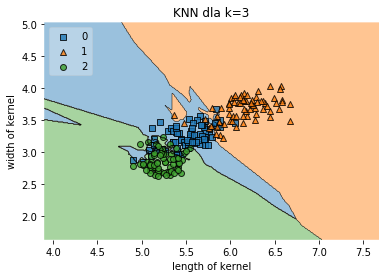

In [47]:
knn_comparison(seeds, ['length of kernel', 'width of kernel'], 3)